# ИНДИВИДУАЛЬНОЕ ЗАДАНИЕ НА ПРАКТИКУ

Исследовать и классифицировать тексты песен в 2х жанрах  с использованием различных методов анализа текста и машинного обучения. Визуализировать структуру текстов, выделить ключевые слова и темы, а также оценить эффективность классификации с помощью матриц ошибок для различных классификаторов (SVM, KNN, Random Forest, Gradient Boosting).


    1.Предобработка текстов:
        Токенизация текстов.
        Исключение стоп-слов и знаков препинания.

    2.Визуализация:
        Построение облака слов для выделения часто встречающихся терминов.
        Создание гистограммы для отображения наиболее частых слов.
        Построение тепловой карты для оценки важности слов с использованием TF-IDF.
        Визуализация матриц ошибок для оценки результатов классификации.

    3.Машинное обучение:
        Разделение данных на тренировочные и тестовые наборы.
        Обучение классификаторов (SVM, KNN, Random Forest, Gradient Boosting).
        Предсказание жанра песен и оценка точности классификации.

    4.Анализ результатов:
        Оценка влияния различных методов визуализации на понимание структуры текстов.
        Анализ ключевых слов и тем в песнях каждого жанра.
        Сравнение эффективности классификации между разными классификаторами.

Цель:
Понять особенности текстов песен в 2х жанрах , выделить их визуальные и структурные характеристики, а также определить эффективность различных методов классификации для данной задачи.
Визуализация текстовых данных позволяет легко исследовать и сравнивать структуры текстов песен, выявлять ключевые темы и проводить анализ эффективности классификации. Задача визуализации важна для лучшего понимания текстовых данных и выявления паттернов, которые могут быть невидимы при обычном текстовом анализе.


# Ход работы

In [1]:
import requests
from bs4 import BeautifulSoup
import time
import pandas as pd
import numpy as np
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from string import punctuation
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize
from collections import Counter
import math
import sklearn
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from wordcloud import WordCloud
import matplotlib.pyplot as plt


#Сбор данных парсер собрирает тексты песен из веб-сайта lyrics.com. 
#Эти песни разделеям на два жанра: "pop" и "rap".
BASE_URL = "https://www.lyrics.com"

# Задаем ссылки для сбора песен в жанрах "pop" и "rap"
pop_links = [
    '/lyric/31566639/Eminem/Guts+Over+Fear',
    '/lyric/35378068/Eminem/Kamikaze',
    '/lyric/31566636/Eminem/Fine+Line',
    '/lyric/35368562/Eminem/Not+Alike',
    '/lyric/35368565/Eminem/Normal',
    '/lyric/35368563/Eminem/Stepping+Stone',
    '/lyric/35368568/Eminem/Greatest',
    '/lyric/35368567/Eminem/Lucky+You',
    '/lyric/35368569/Eminem/The+Ringer',
    '/lyric/34675916/Eminem/Believe',
    '/lyric/34675914/Eminem/Untouchable',
    '/lyric/34675913/Eminem/River'
]

rap_links = [
    '/lyric/34675911/Eminem/Remind+Me',
    '/lyric/34675908/Eminem/Bad+Husband',
    '/lyric/34675907/Eminem/Tragic+Endings',
    '/lyric/35368563/Eminem/Stepping+Stone'
    '/lyric/34675906/Eminem/Framed',
    '/lyric/34675905/Eminem/Nowhere+Fast',
    '/lyric/34675904/Eminem/Heat',
    '/lyric/34675903/Eminem/Offended',
    '/lyric/34675902/Eminem/Need+Me',
    '/lyric/34675901/Eminem/In+Your+Head',
    '/lyric/34675900/Eminem/Castle',
    '/lyric/31566644/Eminem/Shady+XV',
    '/lyric/31566643/Eminem/Psychopath+Killer'
]

# Функция для сбора текстов песен по ссылкам
def collect_lyrics(links):
    songs_lyrics = {}
    for link in links:
        soup = get_soup(link)
        song_name = soup.find('h1', {'class': 'lyric-title'}).text
        try:
            lyrics = soup.find('pre', {'id': 'lyric-body-text'}).text
            songs_lyrics[song_name] = lyrics
        except AttributeError:
            print(f'No lyrics for "{song_name}"')
        time.sleep(5)  # для предотвращения блокировки
    return songs_lyrics

# Функция для получения BeautifulSoup объекта из URL
def get_soup(path):
    r = requests.get(BASE_URL + path)
    soup = BeautifulSoup(r.text, 'html.parser')
    return soup

# Собираем тексты песен для жанров "pop" и "rap"
pop_lyrics = collect_lyrics(pop_links)
rap_lyrics = collect_lyrics(rap_links)

# проверка  что количество песен в обоих жанрах равно
if len(pop_lyrics) == len(rap_lyrics):
    print(f'Оба жанра имеют {len(pop_lyrics)} песен.')
else:
    print('Количество песен в обоих жанрах неодинаково.')

Оба жанра имеют 12 песен.


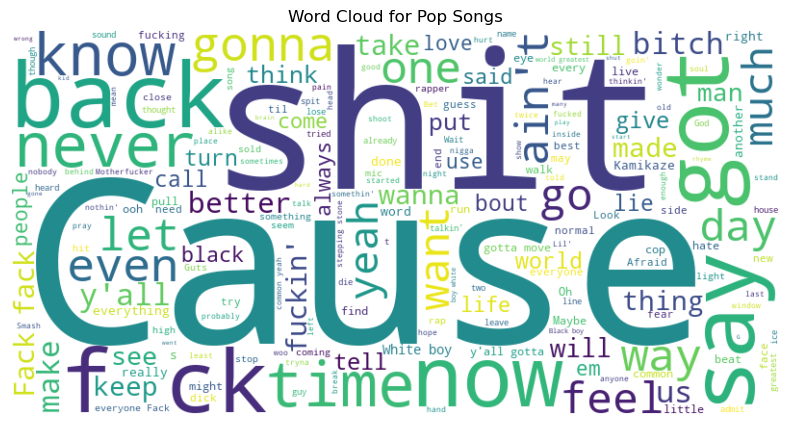

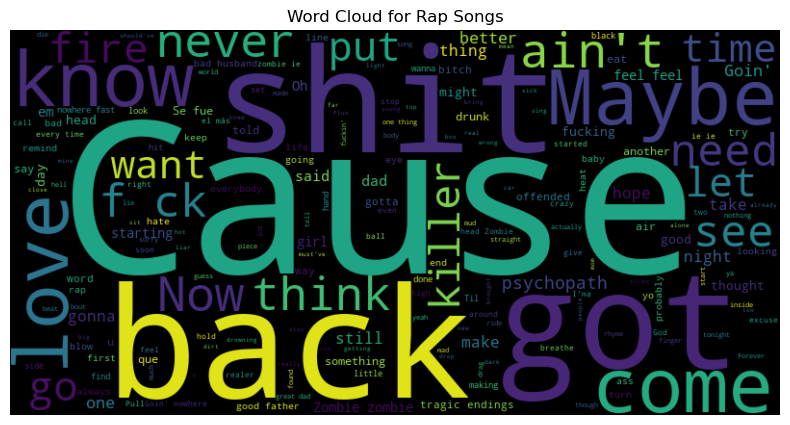

In [2]:
#наиболее часто встречающиеся слова в текстах песен.
# Облако слов для жанра "pop"
pop_lyrics_text = ' '.join(pop_lyrics.values())
pop_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(pop_lyrics_text)

plt.figure(figsize=(10, 5))
plt.imshow(pop_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Pop Songs')
plt.show()

# Облако слов для жанра "rap"
rap_lyrics_text = ' '.join(rap_lyrics.values())
rap_wordcloud = WordCloud(width=800, height=400, background_color='black').generate(rap_lyrics_text)

plt.figure(figsize=(10, 5))
plt.imshow(rap_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Rap Songs')
plt.show()

In [3]:
# Объединяем тексты песен
all_lyrics = {**pop_lyrics, **rap_lyrics}

In [4]:
# Отобразил собранные программой-парсером песни
print(f'----- {len(all_lyrics)} songs: -----')
for song_name in all_lyrics:
    print(song_name)

----- 24 songs: -----
Guts Over Fear
Kamikaze
Fine Line
Not Alike
Normal
Stepping Stone
Greatest
Lucky You
The Ringer
Believe
Untouchable
River
Remind Me
Bad Husband
Tragic Endings
Amigo Bronco
Nowhere Fast
Heat
Offended
Need Me
In Your Head
Castle
Shady XV
Psychopath Killer


In [5]:
# Выводим первую песню собранную программой парсером
first_song_name, first_song_lyrics = list(all_lyrics.items())[0]
print(f'Первая песня:\n{first_song_name}\n\n{first_song_lyrics}')

Первая песня:
Guts Over Fear

Feels like a close, it’s coming to
F*ck am I gonna do?
It's too late to start over
This is the only thing I, thing I know

Sometimes I feel like all I ever do is
Find different ways to word the same, old song
Ever since I came along
From the day the song called ‘’Hi! My Name Is’’ dropped
Started thinking my name was fault
'Cause anytime things went wrong
I was the one who they would blame it on
The media made me the equivalent of a modern-day Genghis Khan
Tried to argue it was only entertainment, dawg
Gangsta? Naw, courageous balls
Had to change my style, they said I'm way too soft
And I sound like AZ and Nas, out came the claws
And the fangs been out since then
But up until the instant that I’ve been against it
It was ingrained in me that I wouldn’t amount to a shitstain I thought
No wonder I had to unlearn everything my brain was taught
Do I really belong in this game? I pondered
I just wanna play my part, should I make waves or not?
So back and forth in

In [6]:
#Разбил тексты песен на токены в качестве токенов использовал слова в NLTK
from nltk.tokenize import word_tokenize

In [7]:
# создаем словарь, в котором ключи - названия песен, а значения - списки токенов
song_tokens = {}

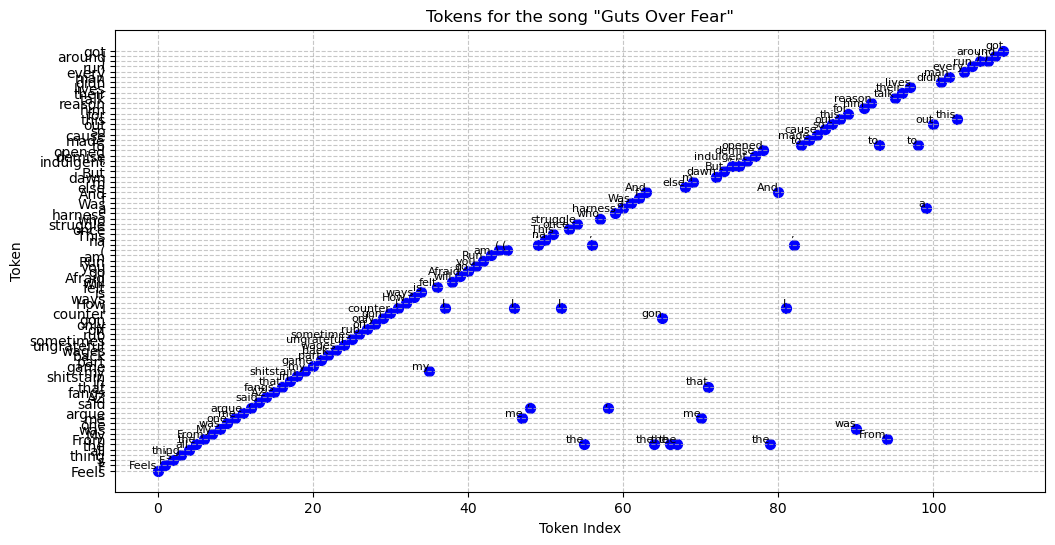

In [67]:
# разбиваем тексты песен на токены
for song_name, lyrics in all_lyrics.items():
    tokens = word_tokenize(lyrics, language='english')
    song_tokens[song_name] = tokens
    
# Выводим пример токенов для первой песни \ закоментил для уменьшения вывода в txt формате\ построил график
#print("Токены для первой песни:")
#for token in song_tokens[list(all_lyrics.keys())[0]]:
#    print(token)
    
    
# Создаем график с улучшенной читаемостью используя диаграмму рассеяния с синими круглыми маркерами
# для отображения токенов песни  добавляем сетку и подпись с индексами для повышения качества визуализации
plt.figure(figsize=(12, 6))
plt.scatter(range(len(display_tokens)), display_tokens, marker='o', color='blue', s=50)
plt.grid(True, linestyle='--', alpha=0.7)

# Добавляем метки для каждого токена слева от маркера
for i, token in enumerate(display_tokens):
    plt.text(i, token, token, ha='right', va='bottom', fontsize=8, color='black')

plt.title(f'Tokens for the song "{first_song_name}"')
plt.xlabel('Token Index')
plt.ylabel('Token')
plt.show()

#График представляет токены для первой песни где каждая точка соответствует одному токену
# Ось x представляет порядковый номер токена
# а ось y  значение токена. 
#Синий цвет  нужен для выделения каждого токена.




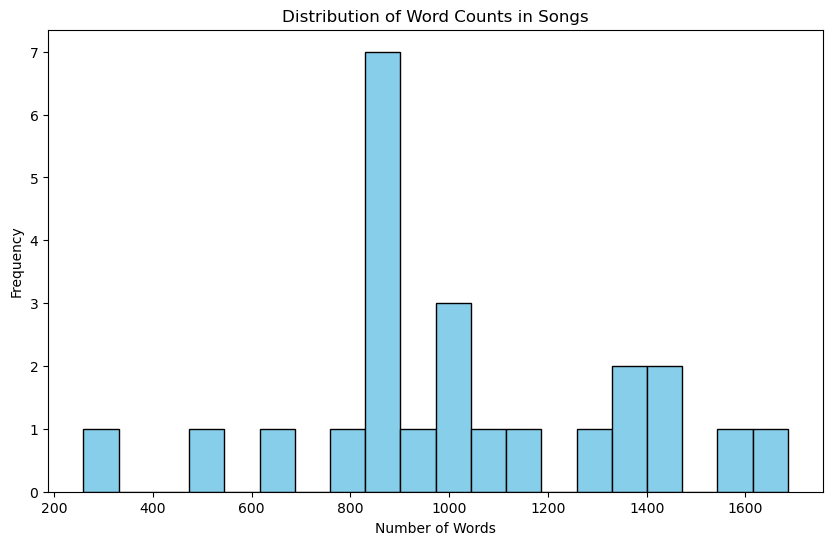

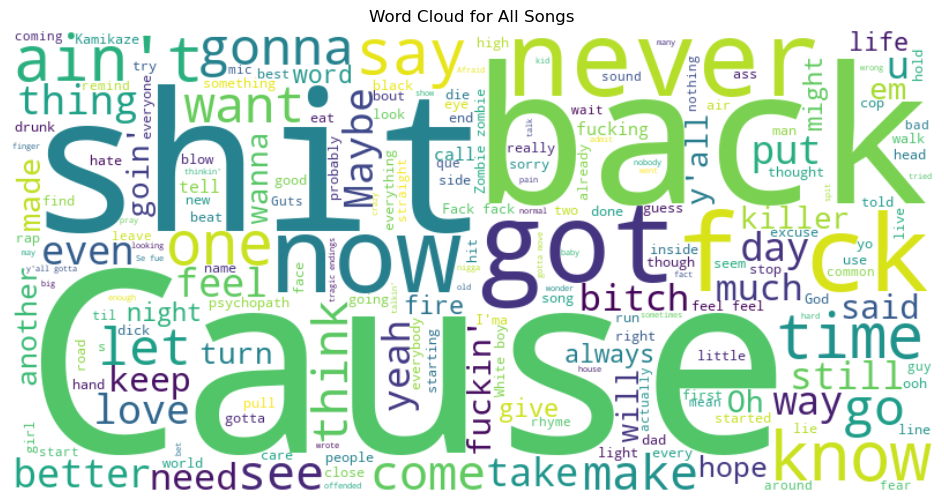

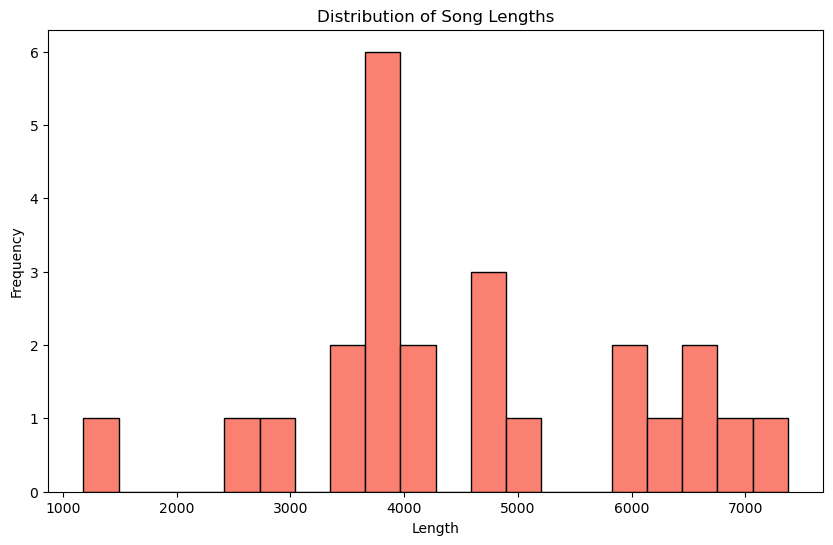

In [9]:
# Визуализация распределения количества слов в песнях
plt.figure(figsize=(10, 6))
plt.hist([len(tokens) for tokens in song_tokens.values()], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Word Counts in Songs')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

# Облако слов для всех текстов песен
all_lyrics_text = ' '.join(all_lyrics.values())
all_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_lyrics_text)

plt.figure(figsize=(12, 6))
plt.imshow(all_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for All Songs')
plt.show()

# Визуализация распределения длины песен
song_lengths = [len(lyrics) for lyrics in all_lyrics.values()]

plt.figure(figsize=(10, 6))
plt.hist(song_lengths, bins=20, color='salmon', edgecolor='black')
plt.title('Distribution of Song Lengths')
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.show()

In [12]:
#Исключил стоп слова знаков препинания из токенизированного текста
from nltk.corpus import stopwords
from string import punctuation

custom_stop_words = ["'m", "'re", "n't", "'s", 'na']  # Доп., стоп слова если необходимо
stop_words = set(stopwords.words('english') + custom_stop_words)

for song_name, tokens in song_tokens.items():
    tokens = [token.lower() for token in tokens]
    filtered_tokens = []
    for token in tokens:
        if token not in stop_words and token not in punctuation:
            filtered_tokens.append(token)
    song_tokens[song_name] = filtered_tokens

# Закоментил спецыально дабы сохранить компактность
#for song_name, tokens in song_tokens.items():
    #print(f'{song_name}\n\n{tokens}\n')


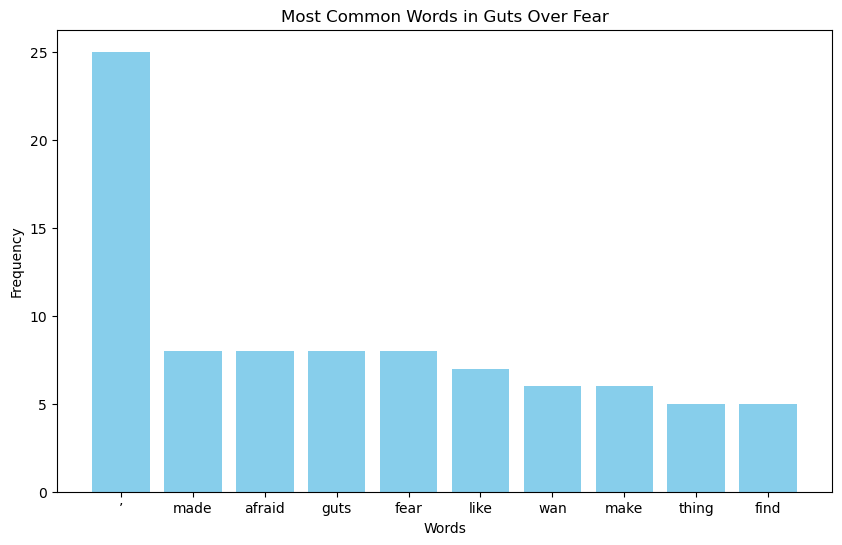

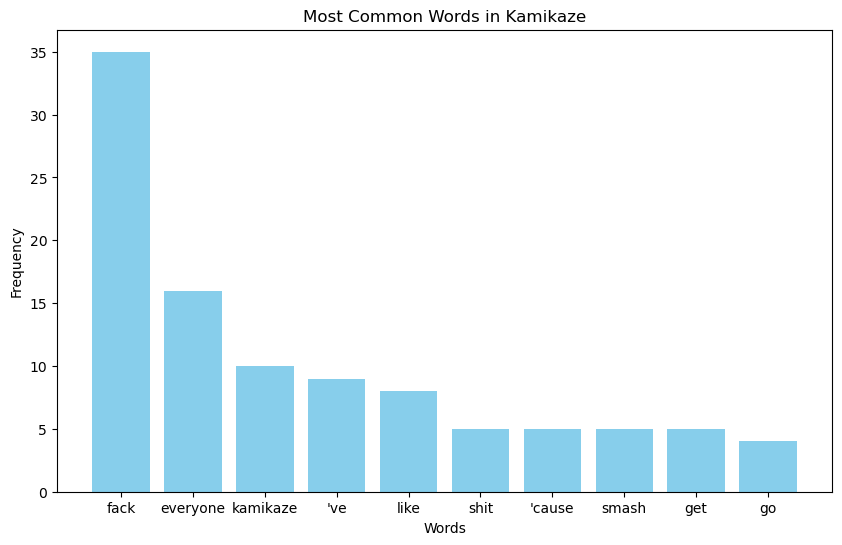

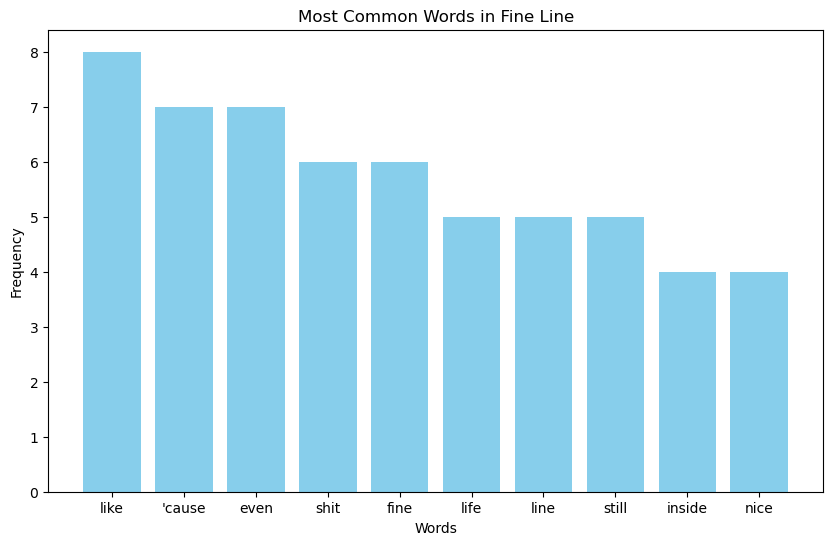

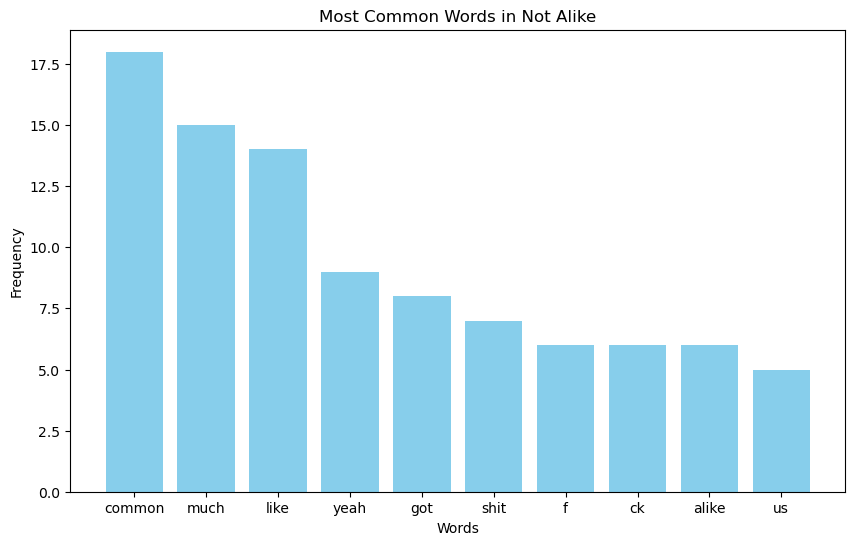

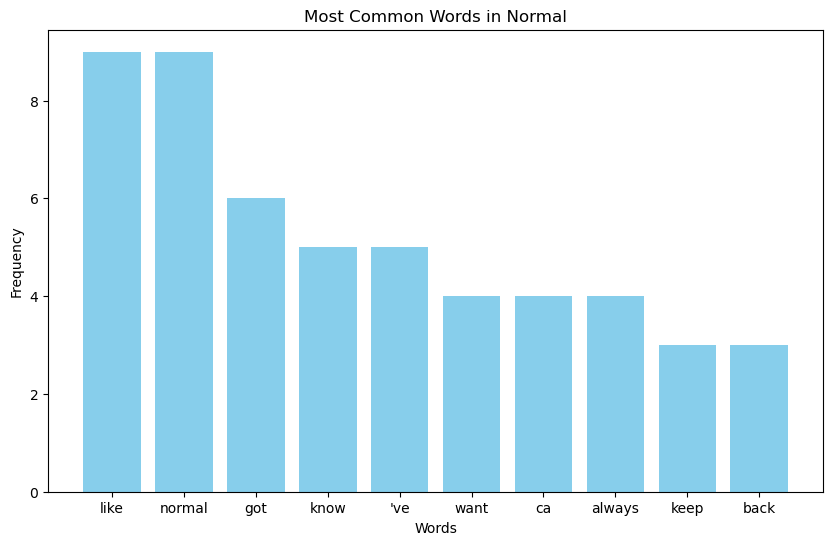

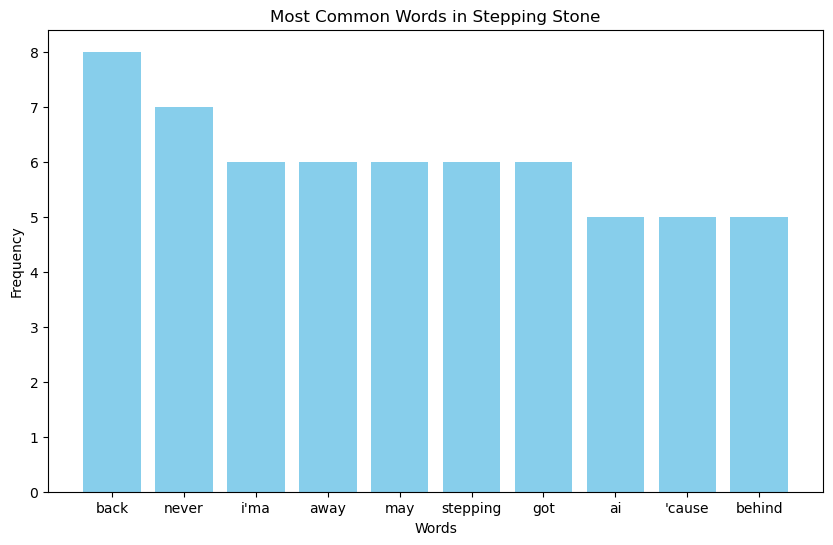

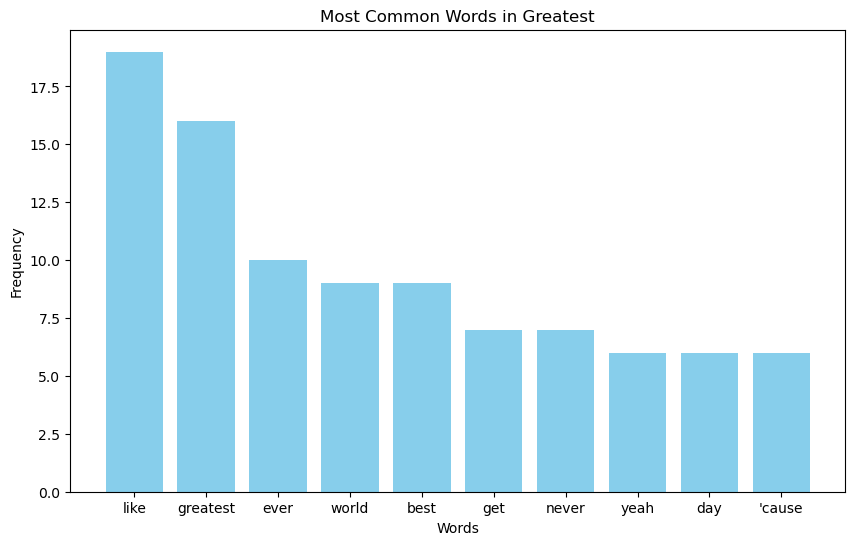

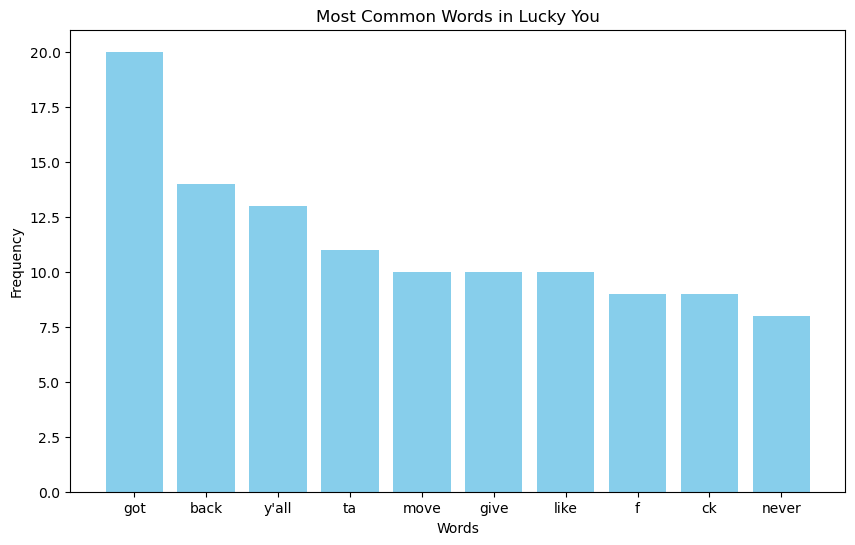

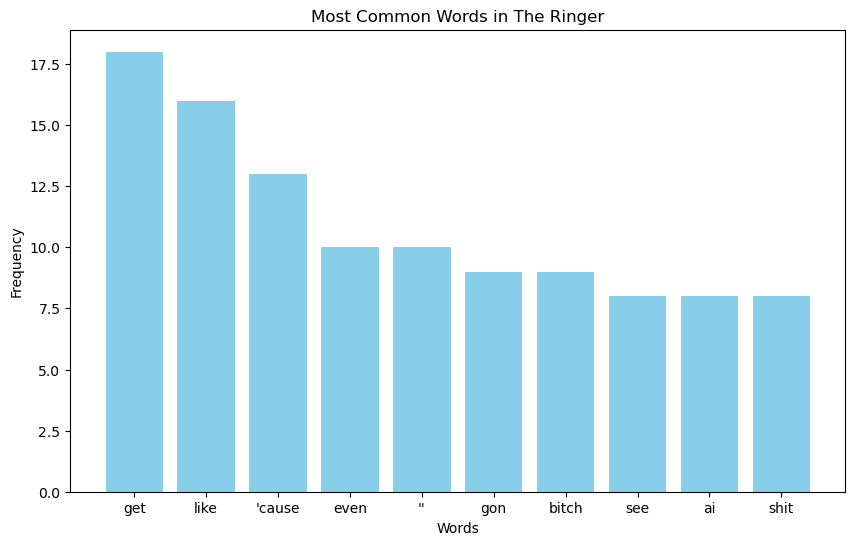

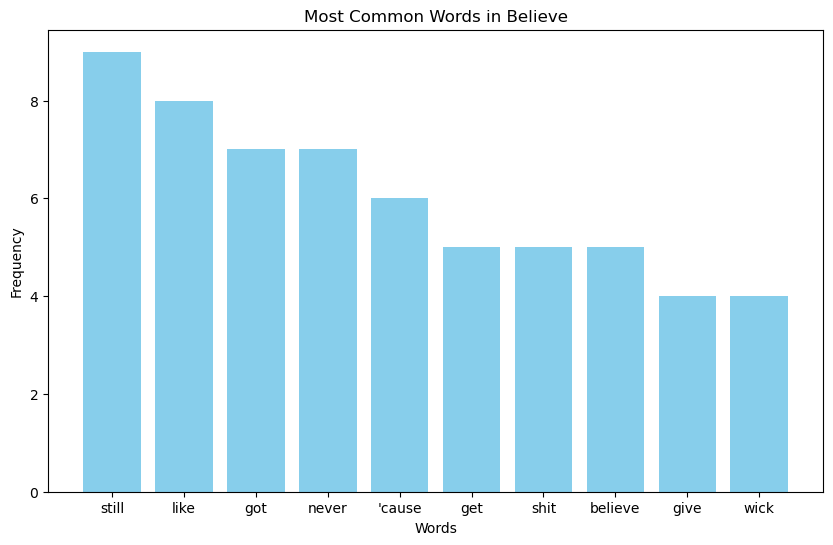

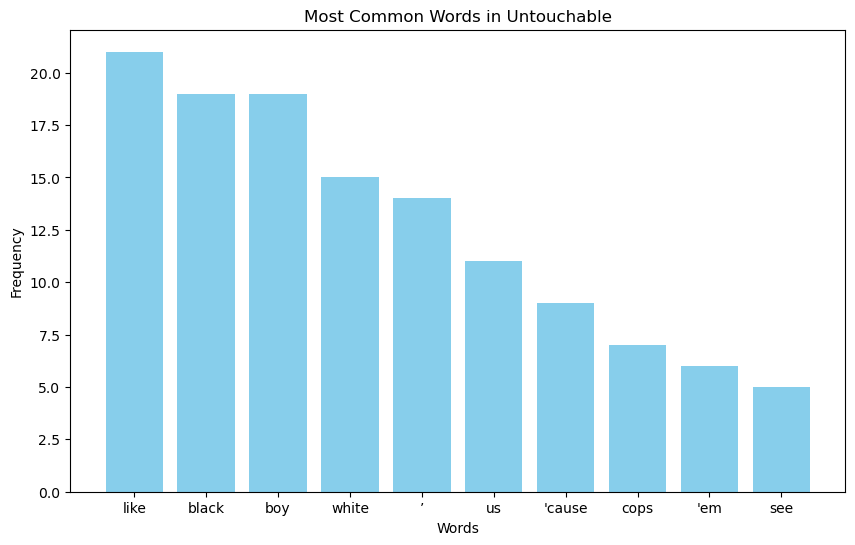

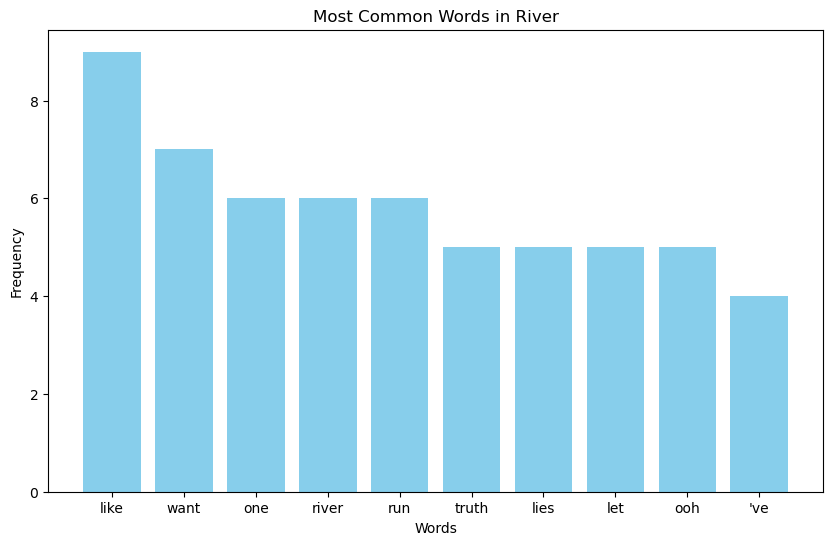

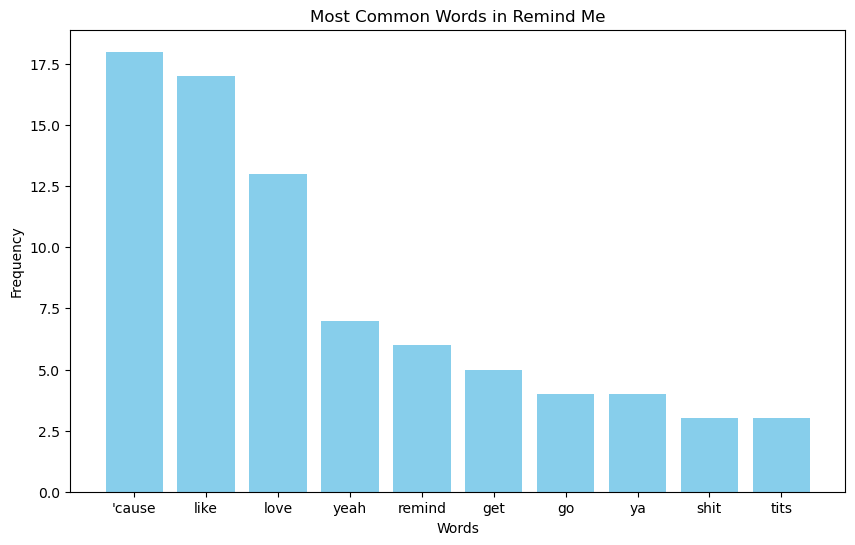

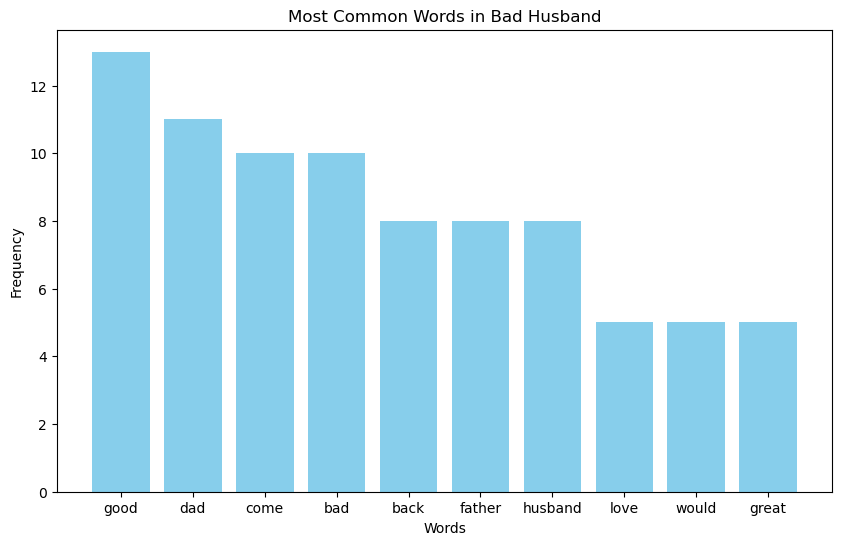

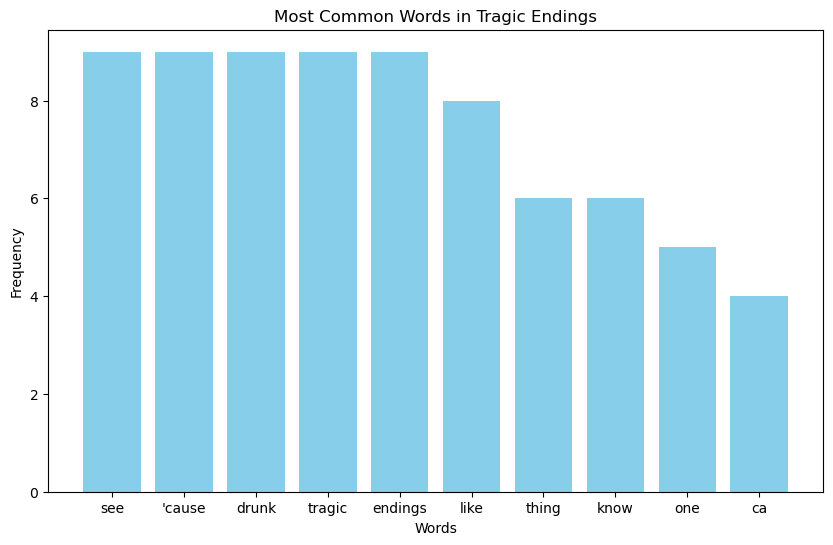

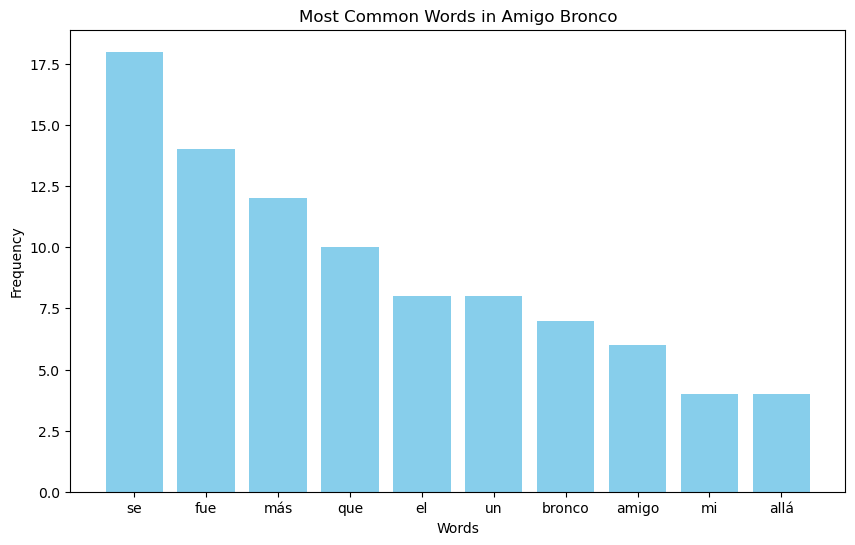

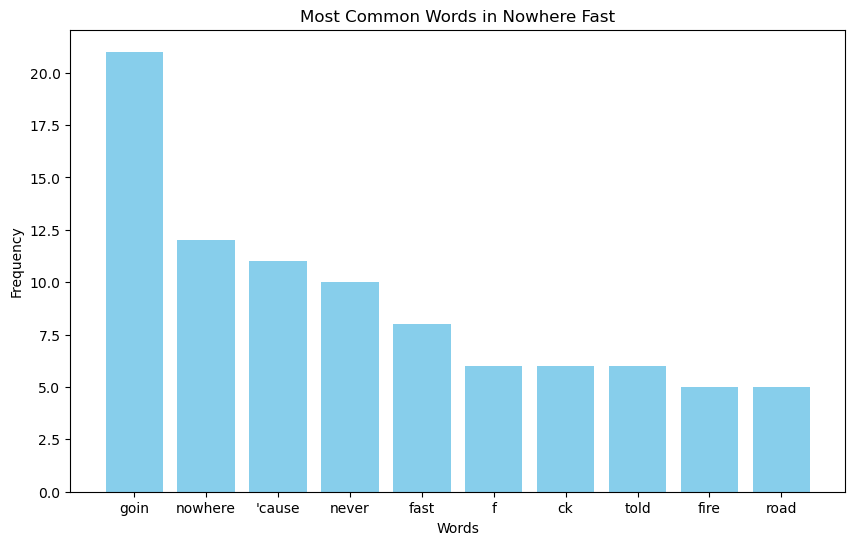

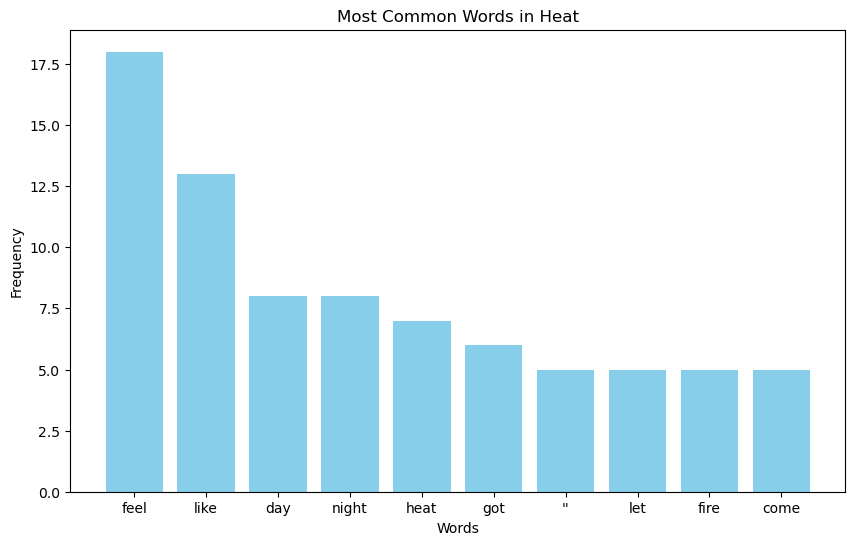

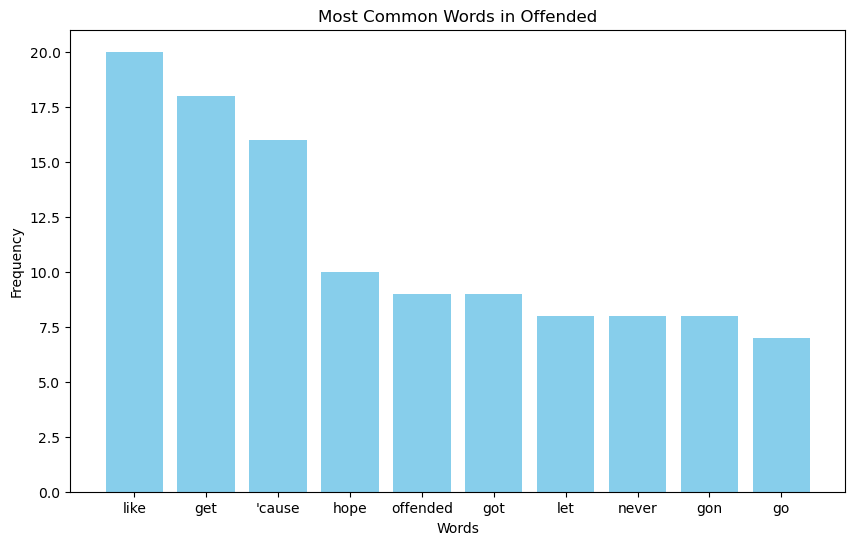

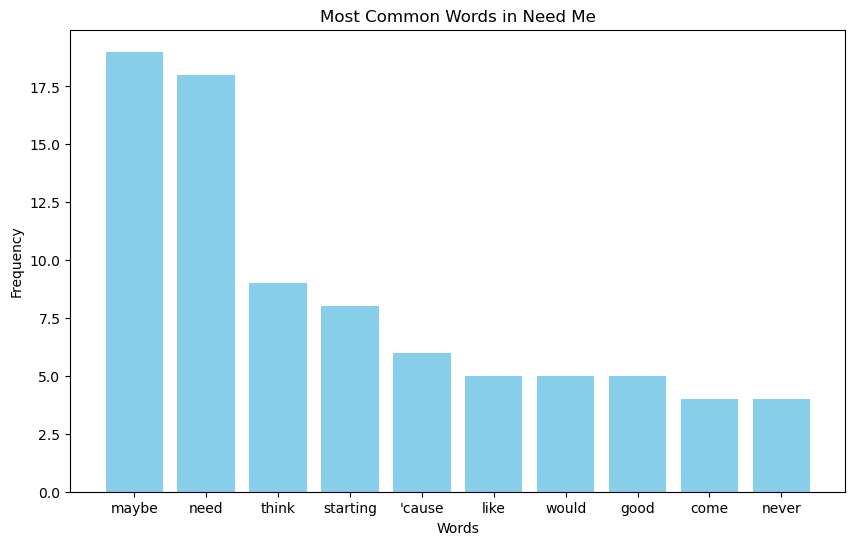

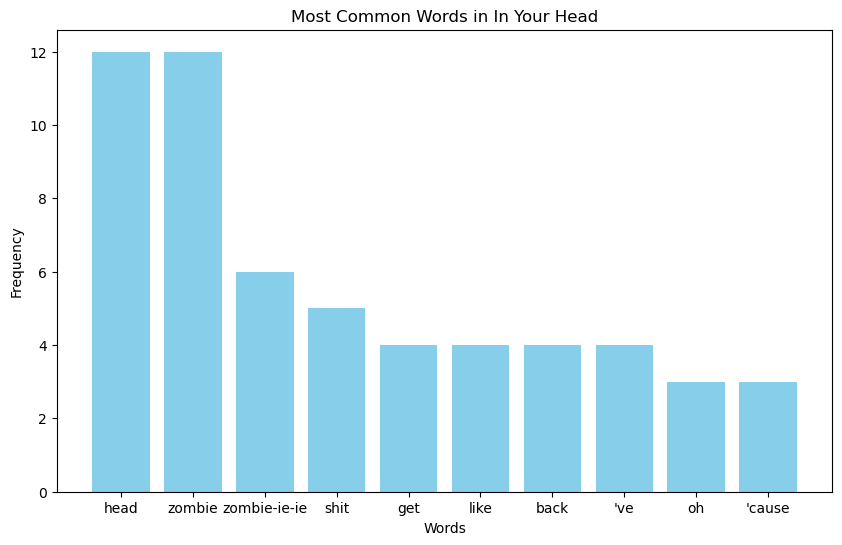

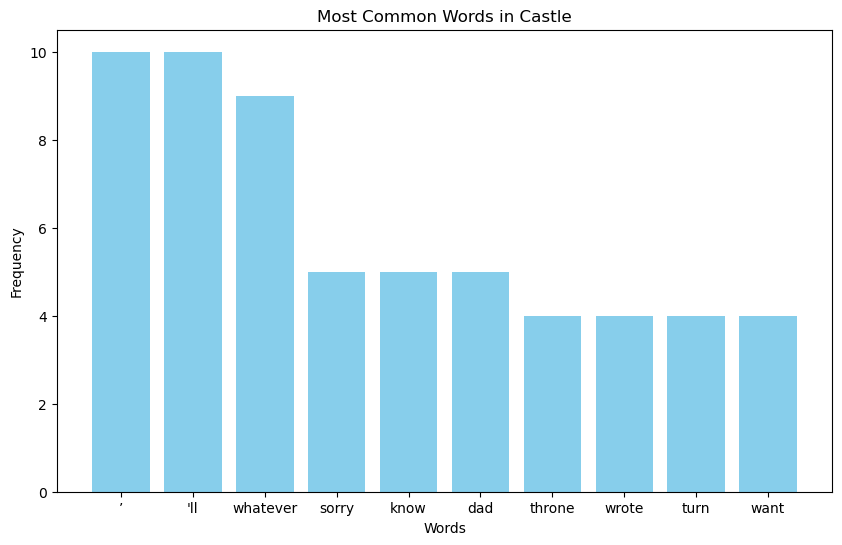

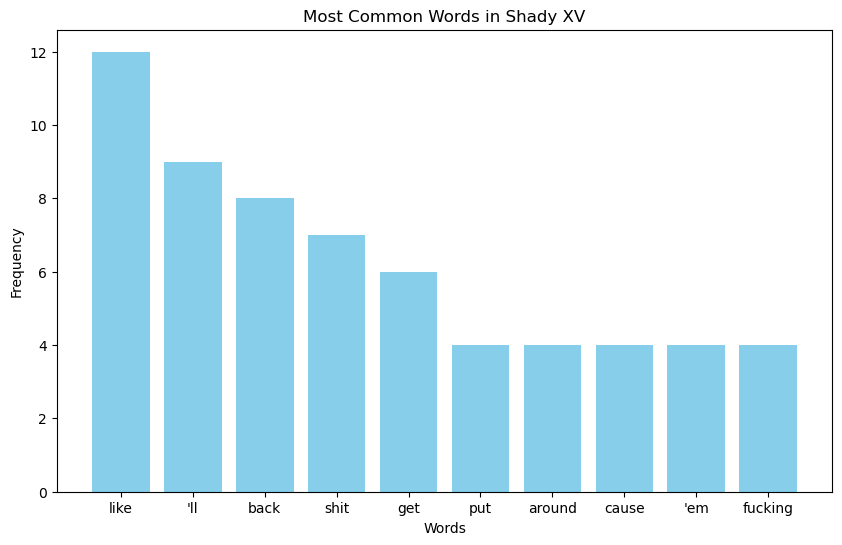

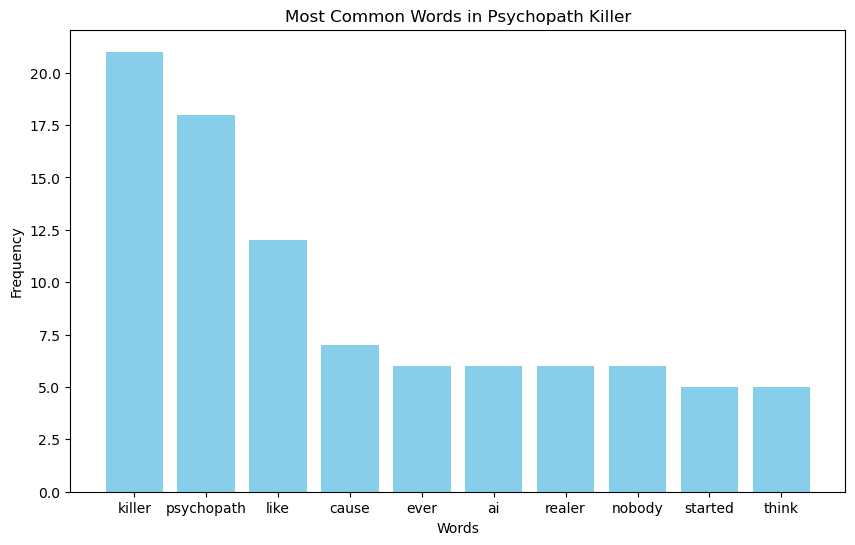

In [13]:
import matplotlib.pyplot as plt
from collections import Counter

# Создаем гистограммы для каждой песни
for song_name, tokens in song_tokens.items():
    token_counts = Counter(tokens)
    common_tokens = token_counts.most_common(10)  # Выбираем 10 наиболее часто встречающихся слов
    labels, values = zip(*common_tokens)

    # Строим гистограмму
    plt.figure(figsize=(10, 6))
    plt.bar(labels, values, color='skyblue')
    plt.title(f'Most Common Words in {song_name}')
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.show()


In [14]:
#стемминг  это процесс получения корневой формы слова. Привел токены к корневой форме с помощью стемминга:
from nltk.stem.porter import PorterStemmer

# создаем стеммер
stemmer = PorterStemmer()

# производим стемминг для каждого токена в каждой песне
for song_name, tokens in song_tokens.items():
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    song_tokens[song_name] = stemmed_tokens

# выводим результат стемминга для первой песни
song_name, tokens = list(song_tokens.items())[0]
print(f'{song_name}\n\n{tokens}')

from collections import Counter


Guts Over Fear

['feel', 'like', 'close', '’', 'come', 'f', 'ck', 'gon', 'late', 'start', 'thing', 'thing', 'know', 'sometim', 'feel', 'like', 'ever', 'find', 'differ', 'way', 'word', 'old', 'song', 'ever', 'sinc', 'came', 'along', 'day', 'song', 'call', '‘', '’', 'hi', 'name', '’', '’', 'drop', 'start', 'think', 'name', 'fault', "'caus", 'anytim', 'thing', 'went', 'wrong', 'one', 'would', 'blame', 'media', 'made', 'equival', 'modern-day', 'genghi', 'khan', 'tri', 'argu', 'entertain', 'dawg', 'gangsta', 'naw', 'courag', 'ball', 'chang', 'style', 'said', 'way', 'soft', 'sound', 'like', 'az', 'na', 'came', 'claw', 'fang', 'sinc', 'instant', '’', 'ingrain', '’', 'amount', 'shitstain', 'thought', 'wonder', 'unlearn', 'everyth', 'brain', 'taught', 'realli', 'belong', 'game', 'ponder', 'wan', 'play', 'part', 'make', 'wave', 'back', 'forth', 'brain', 'tug', 'war', 'wage', '’', 'wan', 'seem', 'ungrat', 'disrespect', 'artform', 'rais', 'upon', 'sometim', 'got', 'ta', 'take', 'loss', 'peopl', 'r

Guts Over Fear

{'feel': 6, 'like': 7, 'close': 3, '’': 25, 'come': 2, 'f': 3, 'ck': 3, 'gon': 4, 'late': 2, 'start': 5, 'thing': 6, 'know': 4, 'sometim': 2, 'ever': 3, 'find': 5, 'differ': 2, 'way': 7, 'word': 3, 'old': 2, 'song': 6, 'sinc': 2, 'came': 2, 'along': 1, 'day': 4, 'call': 1, '‘': 2, 'hi': 1, 'name': 2, 'drop': 1, 'think': 2, 'fault': 1, "'caus": 2, 'anytim': 1, 'went': 1, 'wrong': 1, 'one': 2, 'would': 1, 'blame': 1, 'media': 1, 'made': 8, 'equival': 1, 'modern-day': 1, 'genghi': 1, 'khan': 1, 'tri': 1, 'argu': 1, 'entertain': 1, 'dawg': 1, 'gangsta': 1, 'naw': 1, 'courag': 1, 'ball': 1, 'chang': 1, 'style': 1, 'said': 2, 'soft': 1, 'sound': 3, 'az': 1, 'na': 1, 'claw': 1, 'fang': 1, 'instant': 1, 'ingrain': 1, 'amount': 1, 'shitstain': 1, 'thought': 1, 'wonder': 1, 'unlearn': 1, 'everyth': 2, 'brain': 2, 'taught': 1, 'realli': 2, 'belong': 1, 'game': 1, 'ponder': 1, 'wan': 6, 'play': 2, 'part': 2, 'make': 7, 'wave': 1, 'back': 1, 'forth': 1, 'tug': 1, 'war': 1, 'wage': 1

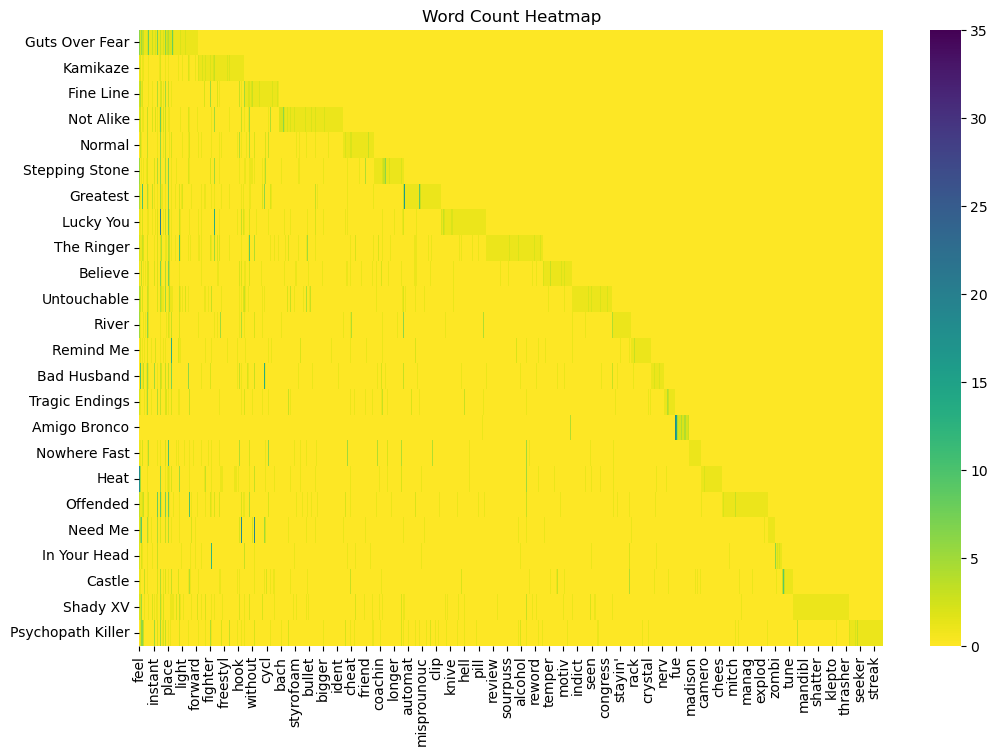

In [51]:
# создаем словарь для хранения количества вхождений каждого слова в каждой песне
song_token_count = {}

# подсчитываем вхождения слов в токенах каждой песни
for song_name, tokens in song_tokens.items():
    token_count = Counter(tokens)
    song_token_count[song_name] = dict(token_count)

# выводим результат подсчета для первой песни
song_name, token_count = list(song_token_count.items())[0]
print(f'{song_name}\n\n{token_count}')

# выводим результат подсчета для каждой песни.\ закоментил для уменьшения масштаба вывода и реализовал карту
#for song_name, token_count in song_token_count.items():
    #print(f'{song_name}\n\n{token_count}\n')

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter


# Преобразуем словарь в DataFrame для удобства работы
df = pd.DataFrame(song_token_count).T.fillna(0)

# Нормализуем значения для каждого слова в диапазоне от 0 до 1
normalized_df = df / df.max()

# Визуализация тепловой карты с белым фоном
plt.figure(figsize=(12, 8))
sns.heatmap(df, cmap='viridis_r', annot=False)
plt.title('Word Count Heatmap')
plt.show()

#логика интерпретации цветов будет темно-зеленые цвета указывают на часто встречающиеся слова
# а светло зеленые или почти белые цвета представляют слова встречающиеся реже.


In [16]:
# создаем пустой словарь где ключи будут названиями песен а значения  словаря BoW для каждой песни
song_bow = {}

# проходимся по всем песням и создадим BoW для каждой
for song_name, tokens in song_tokens.items():
    # используем Counter для подсчета частоты каждого слова в песне
    word_count = Counter(tokens)
    song_bow[song_name] = dict(word_count)

In [17]:
# Преобразуем полученный словарь в DataFrame для удобства работы
bow_df = pd.DataFrame(song_bow).T.fillna(0)

# у нас есть таблица BoW для каждой песни где строки  названия песен а столбцы  слова и их частоты в песне

bow_df

,feel,like,close,’,come,f,ck,gon,late,start,...,dahmer-lik,ridin,lock,bonni,clyde,uncl,ronni,burst,asylum,dine
Guts Over Fear,6.0,7.0,3.0,25.0,2.0,3.0,3.0,4.0,2.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Kamikaze,1.0,8.0,1.0,0.0,2.0,0.0,0.0,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Fine Line,3.0,8.0,1.0,0.0,4.0,1.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Not Alike,2.0,14.0,1.0,0.0,3.0,6.0,6.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Normal,0.0,9.0,0.0,0.0,3.0,2.0,2.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Stepping Stone,5.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Greatest,4.0,19.0,0.0,0.0,1.0,4.0,4.0,4.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Lucky You,1.0,10.0,0.0,0.0,1.0,9.0,9.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
The Ringer,2.0,16.0,1.0,0.0,1.0,7.0,7.0,9.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Believe,1.0,8.0,2.0,0.0,0.0,2.0,2.0,2.0,1.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
# Заменяем все ненулевые значения в таблице BoW на 1 (если слово встречается то 1 иначе 0)
bow_df = bow_df.map(lambda x: 1 if x > 0 else 0)

# Выводим  обновленную таблицу BoW где теперь 1 указывает на наличие слова в песне а 0  на отсутствие
bow_df

,feel,like,close,’,come,f,ck,gon,late,start,...,dahmer-lik,ridin,lock,bonni,clyde,uncl,ronni,burst,asylum,dine
Guts Over Fear,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
Kamikaze,1,1,1,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
Fine Line,1,1,1,0,1,1,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
Not Alike,1,1,1,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
Normal,0,1,0,0,1,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
Stepping Stone,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
Greatest,1,1,0,0,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
Lucky You,1,1,0,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
The Ringer,1,1,1,0,1,1,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
Believe,1,1,1,0,0,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [19]:
# Вычисляем TF для каждой песни
total_word_count = bow_df.sum(axis=1)  # Общее количество слов в каждой песне
tf_df = bow_df.divide(total_word_count, axis=0)

# Выводим таблицу TF
tf_df

,feel,like,close,’,come,f,ck,gon,late,start,...,dahmer-lik,ridin,lock,bonni,clyde,uncl,ronni,burst,asylum,dine
Guts Over Fear,0.003953,0.003953,0.003953,0.003953,0.003953,0.003953,0.003953,0.003953,0.003953,0.003953,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Kamikaze,0.004149,0.004149,0.004149,0.000000,0.004149,0.000000,0.000000,0.004149,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Fine Line,0.004082,0.004082,0.004082,0.000000,0.004082,0.004082,0.004082,0.000000,0.004082,0.004082,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Not Alike,0.002488,0.002488,0.002488,0.000000,0.002488,0.002488,0.002488,0.002488,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Normal,0.000000,0.004049,0.000000,0.000000,0.004049,0.004049,0.004049,0.000000,0.000000,0.004049,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Stepping Stone,0.003891,0.003891,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003891,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Greatest,0.003135,0.003135,0.000000,0.000000,0.003135,0.003135,0.003135,0.003135,0.003135,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Lucky You,0.002667,0.002667,0.000000,0.000000,0.002667,0.002667,0.002667,0.002667,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
The Ringer,0.002079,0.002079,0.002079,0.000000,0.002079,0.002079,0.002079,0.002079,0.000000,0.002079,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Believe,0.003155,0.003155,0.003155,0.000000,0.000000,0.003155,0.003155,0.003155,0.003155,0.003155,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [20]:
# Вычисляем IDF для каждого слова
total_song_count = len(bow_df)  # Общее количество песен
word_presence = bow_df.astype(bool).sum(axis=0)  # Количество песен, в которых встречается каждое слово
idf_series = word_presence.apply(lambda x: math.log10(total_song_count / x))

# Вывод слов и их соответствующие IDF значения
idf_series

feel      0.101458
like      0.018483
close     0.338819
’         0.778151
come      0.079181
            ...   
uncl      1.380211
ronni     1.380211
burst     1.380211
asylum    1.380211
dine      1.380211
Length: 3212, dtype: float64

In [21]:
# Перемножаем значения TF и IDF
tfidf_matrix = tf_df * idf_series

# Выводим матрицу TF-IDF
tfidf_matrix

,feel,like,close,’,come,f,ck,gon,late,start,...,dahmer-lik,ridin,lock,bonni,clyde,uncl,ronni,burst,asylum,dine
Guts Over Fear,0.000401,0.000073,0.001339,0.003076,0.000313,0.000401,0.000401,0.000925,0.002115,0.001339,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Kamikaze,0.000421,0.000077,0.001406,0.000000,0.000329,0.000000,0.000000,0.000971,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Fine Line,0.000414,0.000075,0.001383,0.000000,0.000323,0.000414,0.000414,0.000000,0.002184,0.001383,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Not Alike,0.000252,0.000046,0.000843,0.000000,0.000197,0.000252,0.000252,0.000582,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Normal,0.000000,0.000075,0.000000,0.000000,0.000321,0.000411,0.000411,0.000000,0.000000,0.001372,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Stepping Stone,0.000395,0.000072,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001318,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Greatest,0.000318,0.000058,0.000000,0.000000,0.000248,0.000318,0.000318,0.000734,0.001677,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Lucky You,0.000271,0.000049,0.000000,0.000000,0.000211,0.000271,0.000271,0.000624,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
The Ringer,0.000211,0.000038,0.000704,0.000000,0.000165,0.000211,0.000211,0.000487,0.000000,0.000704,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Believe,0.000320,0.000058,0.001069,0.000000,0.000000,0.000320,0.000320,0.000738,0.001688,0.001069,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


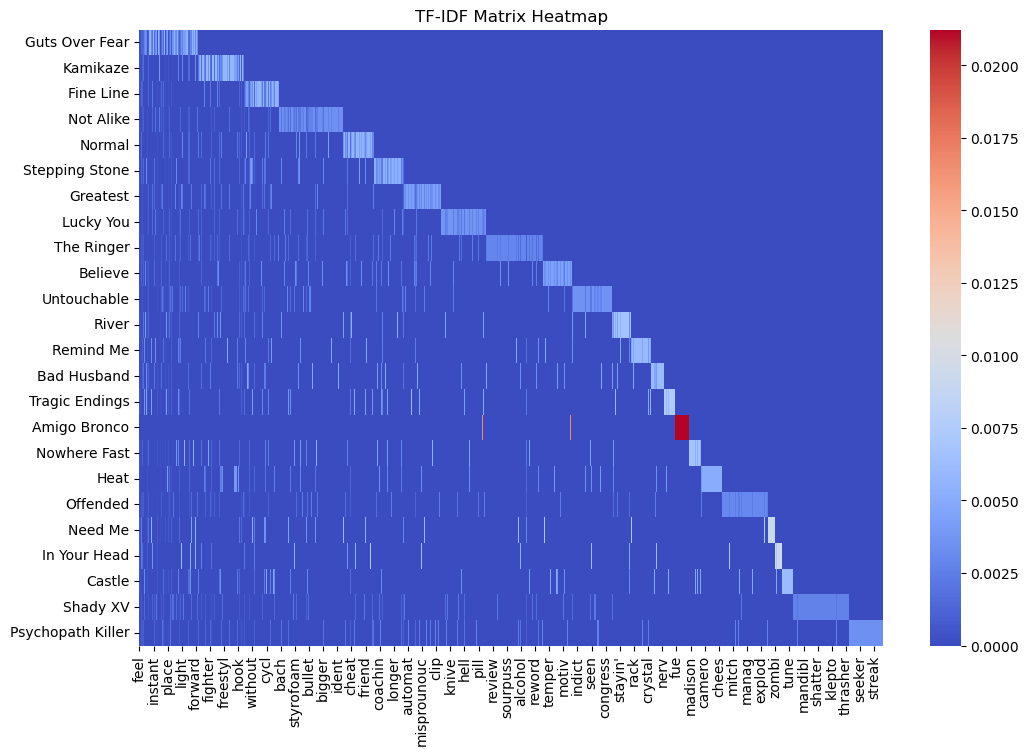

In [22]:
import seaborn as sns

# Визуализация тепловой карты для матрицы TF-IDF
plt.figure(figsize=(12, 8))
sns.heatmap(tfidf_matrix, cmap='coolwarm', annot=False)
plt.title('TF-IDF Matrix Heatmap')
plt.show()

# Выберем первые 12 поп-песен
pop_songs_tfidf = tfidf_matrix.iloc[:12]

In [23]:
# Выведем выбранные поп-песни
pop_songs_tfidf

# Выберем первые 12 реп-песен
rap_songs_tfidf = tfidf_matrix.iloc[12:24]
rap_songs_tfidf

,feel,like,close,’,come,f,ck,gon,late,start,...,dahmer-lik,ridin,lock,bonni,clyde,uncl,ronni,burst,asylum,dine
Remind Me,0.000000,0.000081,0.000000,0.000000,0.000346,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Bad Husband,0.000000,0.000082,0.001506,0.000000,0.000352,0.000451,0.000451,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Tragic Endings,0.000551,0.000100,0.000000,0.000000,0.000430,0.000551,0.000551,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Amigo Bronco,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Nowhere Fast,0.000495,0.000090,0.000000,0.000000,0.000386,0.000495,0.000495,0.001142,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Heat,0.000373,0.000068,0.000000,0.000000,0.000291,0.000373,0.000373,0.000861,0.001967,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Offended,0.000222,0.000041,0.000743,0.000000,0.000174,0.000222,0.000222,0.000513,0.000000,0.000743,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Need Me,0.000676,0.000123,0.000000,0.000000,0.000528,0.000000,0.000000,0.000000,0.000000,0.002259,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
In Your Head,0.000686,0.000125,0.000000,0.000000,0.000000,0.000686,0.000686,0.000000,0.003616,0.002289,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Castle,0.000449,0.000082,0.001499,0.003443,0.000350,0.000449,0.000449,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [24]:
# Объединим выбранные песни в один список
songs_for_classifier = pd.concat([pop_songs_tfidf, rap_songs_tfidf])

# Выведем выбранные песни для классификатора
songs_for_classifier

,feel,like,close,’,come,f,ck,gon,late,start,...,dahmer-lik,ridin,lock,bonni,clyde,uncl,ronni,burst,asylum,dine
Guts Over Fear,0.000401,0.000073,0.001339,0.003076,0.000313,0.000401,0.000401,0.000925,0.002115,0.001339,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Kamikaze,0.000421,0.000077,0.001406,0.000000,0.000329,0.000000,0.000000,0.000971,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Fine Line,0.000414,0.000075,0.001383,0.000000,0.000323,0.000414,0.000414,0.000000,0.002184,0.001383,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Not Alike,0.000252,0.000046,0.000843,0.000000,0.000197,0.000252,0.000252,0.000582,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Normal,0.000000,0.000075,0.000000,0.000000,0.000321,0.000411,0.000411,0.000000,0.000000,0.001372,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Stepping Stone,0.000395,0.000072,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001318,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Greatest,0.000318,0.000058,0.000000,0.000000,0.000248,0.000318,0.000318,0.000734,0.001677,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Lucky You,0.000271,0.000049,0.000000,0.000000,0.000211,0.000271,0.000271,0.000624,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
The Ringer,0.000211,0.000038,0.000704,0.000000,0.000165,0.000211,0.000211,0.000487,0.000000,0.000704,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Believe,0.000320,0.000058,0.001069,0.000000,0.000000,0.000320,0.000320,0.000738,0.001688,0.001069,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [25]:
# Создаем матрицу признаков X
X = songs_for_classifier

# Создаем вектор меток y, где 0 обозначает поп-песни, а 1 обозначает реп-песни
y = [0] * 12 + [1] * 12

# Выведем матрицу признаков X и вектор меток y
print("Матрица признаков (X):")
print(X)
print("\nВектор меток (y):")
print(y)

Матрица признаков (X):
                       feel      like     close         ’      come         f  \
Guts Over Fear     0.000401  0.000073  0.001339  0.003076  0.000313  0.000401   
Kamikaze           0.000421  0.000077  0.001406  0.000000  0.000329  0.000000   
Fine Line          0.000414  0.000075  0.001383  0.000000  0.000323  0.000414   
Not Alike          0.000252  0.000046  0.000843  0.000000  0.000197  0.000252   
Normal             0.000000  0.000075  0.000000  0.000000  0.000321  0.000411   
Stepping Stone     0.000395  0.000072  0.000000  0.000000  0.000000  0.000000   
Greatest           0.000318  0.000058  0.000000  0.000000  0.000248  0.000318   
Lucky You          0.000271  0.000049  0.000000  0.000000  0.000211  0.000271   
The Ringer         0.000211  0.000038  0.000704  0.000000  0.000165  0.000211   
Believe            0.000320  0.000058  0.001069  0.000000  0.000000  0.000320   
Untouchable        0.000258  0.000047  0.000862  0.001980  0.000201  0.000258   
River

In [26]:
from sklearn.model_selection import train_test_split

# Разделяем данные на тренировочный (70%) и тестовый (30%) наборы для всех классификаторов
X_train_svc, X_test_svc, y_train_svc, y_test_svc = train_test_split(X, y, test_size=0.3, random_state=42)
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(X, y, test_size=0.3, random_state=42)
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X, y, test_size=0.3, random_state=42)
X_train_gb, X_test_gb, y_train_gb, y_test_gb = train_test_split(X, y, test_size=0.3, random_state=42)

In [27]:
# Выводим размеры наборов данных для всех классификаторов
print("Размер тренировочных данных (X_train_svc, y_train_svc):", X_train_svc.shape, len(y_train_svc))
print("Размер тестовых данных (X_test_svc, y_test_svc):", X_test_svc.shape, len(y_test_svc))
print("Размер тренировочных данных (X_train_knn, y_train_knn):", X_train_knn.shape, len(y_train_knn))
print("Размер тестовых данных (X_test_knn, y_test_knn):", X_test_knn.shape, len(y_test_knn))
print("Размер тренировочных данных (X_train_rf, y_train_rf):", X_train_rf.shape, len(y_train_rf))
print("Размер тестовых данных (X_test_rf, y_test_rf):", X_test_rf.shape, len(y_test_rf))
print("Размер тренировочных данных (X_train_gb, y_train_gb):", X_train_gb.shape, len(y_train_gb))
print("Размер тестовых данных (X_test_gb, y_test_gb):", X_test_gb.shape, len(y_test_gb))

Размер тренировочных данных (X_train_svc, y_train_svc): (16, 3212) 16
Размер тестовых данных (X_test_svc, y_test_svc): (8, 3212) 8
Размер тренировочных данных (X_train_knn, y_train_knn): (16, 3212) 16
Размер тестовых данных (X_test_knn, y_test_knn): (8, 3212) 8
Размер тренировочных данных (X_train_rf, y_train_rf): (16, 3212) 16
Размер тестовых данных (X_test_rf, y_test_rf): (8, 3212) 8
Размер тренировочных данных (X_train_gb, y_train_gb): (16, 3212) 16
Размер тестовых данных (X_test_gb, y_test_gb): (8, 3212) 8


In [28]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Создаем экземпляр классификатора метода опорных векторов
svm_classifier = SVC()

# Создаем экземпляр классификатора метода k-ближайших соседей (KNN)
knn_classifier = KNeighborsClassifier()

# Создаем экземпляр классификатора Random Forest
rf_classifier = RandomForestClassifier()

# Создаем экземпляр классификатора Gradient Boosting
gb_classifier = GradientBoostingClassifier()

In [29]:
# Выводим информацию о созданных классификаторах
print("Создан классификатор метода опорных векторов (SVM):", svm_classifier)
print("Создан классификатор метода k-ближайших соседей (KNN):", knn_classifier)
print("Создан классификатор метода Random Forest (RF):", rf_classifier)
print("Создан классификатор метода Gradient Boosting  (GB):", gb_classifier)

Создан классификатор метода опорных векторов (SVM): SVC()
Создан классификатор метода k-ближайших соседей (KNN): KNeighborsClassifier()
Создан классификатор метода Random Forest (RF): RandomForestClassifier()
Создан классификатор метода Gradient Boosting  (GB): GradientBoostingClassifier()


In [30]:
# Отключил предупреждения из за устаревших library и функций 
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

from sklearn.metrics import accuracy_score

In [31]:
# Обучаем SVM
svm_classifier.fit(X_train_svc, y_train_svc)

# Обучаем KNN
knn_classifier.fit(X_train_knn, y_train_knn)

# Обучаем Random Forest
rf_classifier.fit(X_train_rf, y_train_rf)

# Обучаем Gradient Boosting
gb_classifier.fit(X_train_gb, y_train_gb)

# Предсказываем метки для тестовых данных
svm_predictions = svm_classifier.predict(X_test_svc)
knn_predictions = knn_classifier.predict(X_test_knn)
rf_predictions = rf_classifier.predict(X_test_rf)
gb_predictions = gb_classifier.predict(X_test_gb)

# Оцениваем точность классификаторов
svm_accuracy = accuracy_score(y_test_svc, svm_predictions)
knn_accuracy = accuracy_score(y_test_knn, knn_predictions)
rf_accuracy = accuracy_score(y_test_rf, rf_predictions)
gb_accuracy = accuracy_score(y_test_gb, gb_predictions)

print("Точность SVM:", svm_accuracy)
print("Точность KNN:", knn_accuracy)
print("Точность Random Forest:", rf_accuracy)
print("Точность Gradient Boosting:", gb_accuracy)

Точность SVM: 0.375
Точность KNN: 0.625
Точность Random Forest: 0.375
Точность Gradient Boosting: 0.375


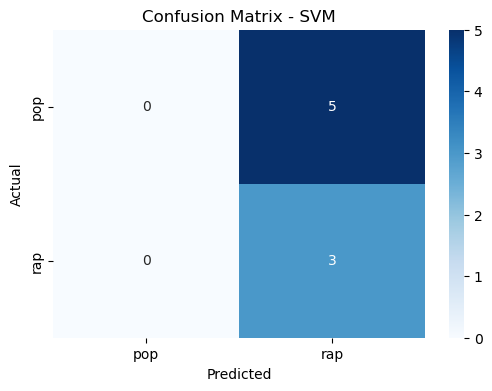

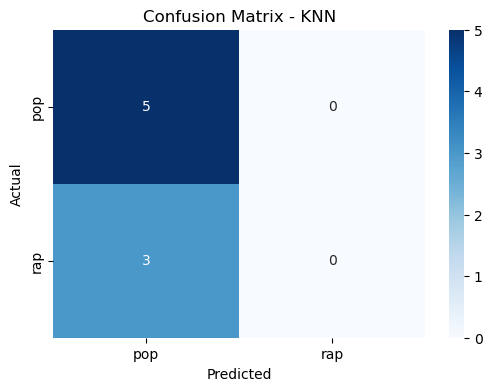

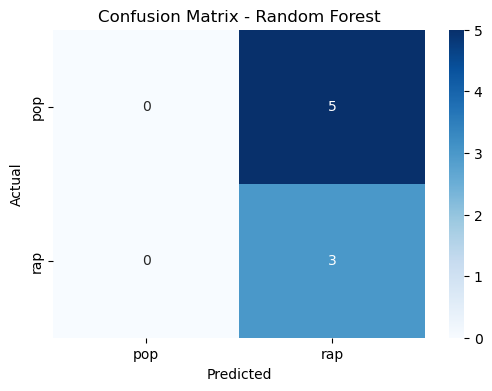

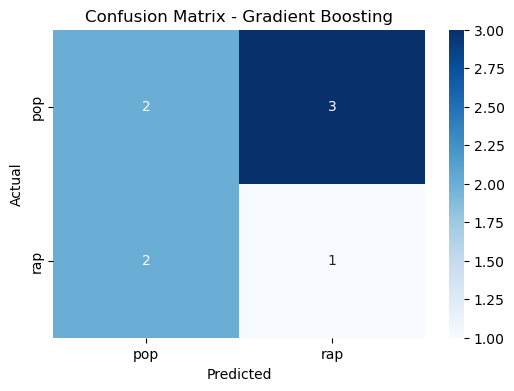

In [32]:
# Визуализируем результаты предсказания и матрицу ошибок (confusion matrix) для каждого классификатора.

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Визуализация матрицы ошибок для SVM
svm_cm = confusion_matrix(y_test_svc, svm_predictions)
plt.figure(figsize=(6, 4))
sns.heatmap(svm_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['pop', 'rap'], yticklabels=['pop', 'rap'])
plt.title('Confusion Matrix - SVM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Визуализация матрицы ошибок для KNN
knn_cm = confusion_matrix(y_test_knn, knn_predictions)
plt.figure(figsize=(6, 4))
sns.heatmap(knn_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['pop', 'rap'], yticklabels=['pop', 'rap'])
plt.title('Confusion Matrix - KNN')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Визуализация матрицы ошибок для Random Forest
rf_cm = confusion_matrix(y_test_rf, rf_predictions)
plt.figure(figsize=(6, 4))
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['pop', 'rap'], yticklabels=['pop', 'rap'])
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Визуализация матрицы ошибок для Gradient Boosting
gb_cm = confusion_matrix(y_test_gb, gb_predictions)
plt.figure(figsize=(6, 4))
sns.heatmap(gb_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['pop', 'rap'], yticklabels=['pop', 'rap'])
plt.title('Confusion Matrix - Gradient Boosting')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# Тепловая карта будет представлять собой матрицу 2x2  где строки и столбцы соответствуют классам "pop" и "rap".
# Значения в ячейках будут представлять количество предсказаний для каждой комбинации классов.

# Значение ячеек  
        # SVM
    # В правом нижнем углу (rap, rap):  показывает кол., случаев, когда модель правильно предсказала "rap" как "rap" (TP).
    # В правом верхнем углу (pop, rap):  показывает кол., случаев, когда модель ошибочно предсказала "pop" как "rap" (FP).
        
        # KNN
    # В левом верхнем углу (pop, pop): показывает кол., случаев, когда модель правильно предсказала "pop" как "pop" (True Negatives - TN).
    # В левом нижнем углу (rap, pop):  показывает кол., случаев, когда модель ошибочно предсказала "rap" как "pop" (False Negatives - FN).

    #Random Forest тоже самое как для SVM
    
    #Gradient Boosting 
    
    # В правом верхнем углу (pop, rap): показывает кол., случаев, когда модель ошибочно предсказала "pop" как "rap" (False Positives - FP).

    # В правом нижнем углу (rap, rap): показывает кол., случаев, когда модель правильно предсказала "rap" как "rap" (True Positives - TP).

    # В левом верхнем углу (pop, pop): показывает кол., случаев, когда модель правильно предсказала "pop" как "pop" (True Negatives - TN).

    # В левом нижнем углу (rap, pop): показывает кол., случаев, когда модель ошибочно предсказала "rap" как "pop" (False Negatives - FN).

#Такая визуализации полезна для понимания где модель делает ошибки и в каких случаях классификация происходит точно.

In [33]:
from sklearn.exceptions import UndefinedMetricWarning
import warnings 
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# Функция для подсчета метрик: точности, полноты, специфичности, прецизионности
def calculate_metrics(y_true, y_pred):
    with warnings.catch_warnings():
        warnings.simplefilter("ignore", category=UndefinedMetricWarning)
        # Вычисляем точность
        accuracy = accuracy_score(y_true, y_pred)

        # Вычисляем прецизионность (precision) с установкой zero_division=1
        precision = precision_score(y_true, y_pred, zero_division=1)

        # Вычисляем полноту (recall)
        recall = recall_score(y_true, y_pred)

        # Вычисляем матрицу ошибок (confusion matrix) и извлекаем true negatives, false positives, false negatives и true positives
        tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

        # Вычисляем специфичность (specificity)
        specificity = tn / (tn + fp)

    return accuracy, precision, recall, specificity

# Пример использования функции:
y_true = [1, 0, 1, 1, 0, 0, 1, 0]  # Реальные метки класса (истинные значения)
y_pred = [1, 0, 1, 0, 1, 0, 1, 1]  # Предсказанные метки класса

# Вызываем функцию для подсчета метрик
accuracy, precision, recall, specificity = calculate_metrics(y_true, y_pred)

In [34]:
# Выводим результаты
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'Specificity: {specificity}')

# использование функции для SVM
accuracy_svm, precision_svm, recall_svm, specificity_svm = calculate_metrics(y_test_svc, svm_predictions)
print("Метрики для SVM:")
print(f'Accuracy: {accuracy_svm}')
print(f'Precision: {precision_svm}')
print(f'Recall: {recall_svm}')
print(f'Specificity: {specificity_svm}\n')

# использование функции для KNN
accuracy_knn, precision_knn, recall_knn, specificity_knn = calculate_metrics(y_test_knn, knn_predictions)
print("Метрики для KNN:")
print(f'Accuracy: {accuracy_knn}')
print(f'Precision: {precision_knn}')
print(f'Recall: {recall_knn}')
print(f'Specificity: {specificity_knn}\n')

# использование функции для Random Forest
accuracy_rf, precision_rf, recall_rf, specificity_rf = calculate_metrics(y_test_rf, rf_predictions)
print("Метрики для Random Forest:")
print(f'Accuracy: {accuracy_rf}')
print(f'Precision: {precision_rf}')
print(f'Recall: {recall_rf}')
print(f'Specificity: {specificity_rf}\n')

# использование функции для Gradient Boosting
accuracy_gb, precision_gb, recall_gb, specificity_gb = calculate_metrics(y_test_gb, gb_predictions)
print("Метрики для Gradient Boosting:")
print(f'Accuracy: {accuracy_gb}')
print(f'Precision: {precision_gb}')
print(f'Recall: {recall_gb}')
print(f'Specificity: {specificity_gb}')

Accuracy: 0.625
Precision: 0.6
Recall: 0.75
Specificity: 0.5
Метрики для SVM:
Accuracy: 0.375
Precision: 0.375
Recall: 1.0
Specificity: 0.0

Метрики для KNN:
Accuracy: 0.625
Precision: 1.0
Recall: 0.0
Specificity: 1.0

Метрики для Random Forest:
Accuracy: 0.375
Precision: 0.375
Recall: 1.0
Specificity: 0.0

Метрики для Gradient Boosting:
Accuracy: 0.375
Precision: 0.25
Recall: 0.3333333333333333
Specificity: 0.4


# Заключение

В ходе анализа текстов песен 2х жанров  был использован комплексный подход, включающий в себя веб-парсинг, токенизацию, TF-IDF анализ, а также применение методов машинного обучения, таких как SVM, KNN, Random Forest и Gradient Boosting. Ключевой частью исследования стала визуализация, которая позволила наглядно представить частотность слов в облаках слов для каждого жанра, а также распределение длин и количества слов в песнях.

Модели машинного обучения проявили  точность в классификации песен по жанрам. Визуализации, такие как облака слов, гистограммы распределения слов, тепловая карта TF-IDF матрицы, а также матрицы ошибок, сделали анализ более наглядным. Эти графические представления не только облегчили восприятие результатов, но и позволили выделить ключевые особенности текстов песен, влияющие на классификацию жанров.

Выполненные визуализации:

    Облака слов для жанров "pop" и "rap".
    Визуализация распределения количества слов в песнях
    Облако слов для всех текстов песен
    Визуализация  длины песен
    Гистограмма распределения количества слов в песнях.
    Тепловая карта TF-IDF матрицы.
    Визуализация результатов предсказания и матриц ошибок для каждого классификатора.